In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [14]:
df=pd.read_csv(r"D:\RNN\international-airline-passengers.csv")
df.head(3)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0


<function matplotlib.pyplot.show(close=None, block=None)>

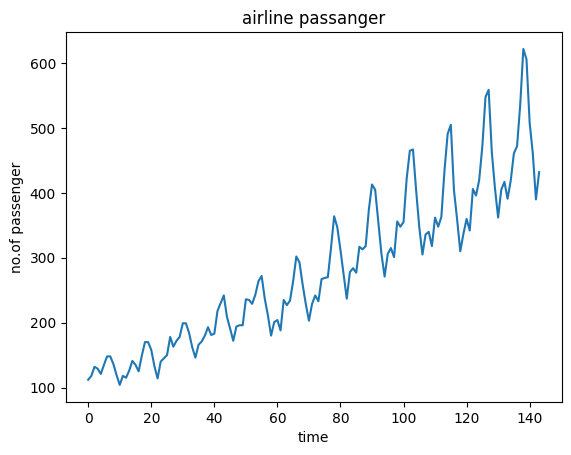

In [15]:
import matplotlib.pyplot as plt
dataset=df.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("no.of passenger")
plt.title("airline passanger")
plt.show

In [16]:
dataset=dataset.reshape(-1,1)
dataset=dataset.astype("float32")
dataset.shape

(146, 1)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [21]:
train_size=int(len(dataset)*0.50)
test_size=len(dataset)-train_size
train=dataset[0:train_size,:]
test=dataset[train_size-len(dataset),:]
print("train_size:{} ,test_size:{}".format(len(train),len(test)))

train_size:73 ,test_size:1


In [23]:
time_stemp=10
datax=[]
datay=[]
for i in range(len(train)-time_stemp-1):
    a=train[i:(i+time_stemp),0]
    datax.append(a)
    datay.append(train[i+time_stemp,0])
    trainx=np.array(datax)
    trainy=np.array(datay)
    

In [24]:
trainx

array([[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
        0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753],
       [0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
        0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ],
       [0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
        0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703],
       [0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
        0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553],
       [0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
        0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104],
       [0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753,
        0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857],
       [0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
        0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557],
       [0.08494207, 0.06177607, 0.0289575

In [25]:
trainy

array([0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857,
       0.05984557, 0.04054055, 0.08687258, 0.12741312, 0.12741312,
       0.10424709, 0.05598456, 0.01930502, 0.06949806, 0.07915059,
       0.08880308, 0.14285713, 0.11389962, 0.13127413, 0.14285713,
       0.18339768, 0.18339768, 0.15444016, 0.11196911, 0.08108109,
       0.1196911 , 0.12934363, 0.14671814, 0.17181468, 0.14864865,
       0.15250966, 0.22007722, 0.24324325, 0.26640925, 0.2027027 ,
       0.16795367, 0.13127413, 0.17374519, 0.17760617, 0.17760617,
       0.25482625, 0.25289574, 0.24131274, 0.26833975, 0.3088803 ,
       0.32432434, 0.25675675, 0.20656371, 0.14671814, 0.18725869,
       0.19305018, 0.16216215, 0.25289574, 0.23745173, 0.25096524,
       0.3088803 , 0.38223937, 0.36486486, 0.2992278 , 0.24131274,
       0.1911197 , 0.24131274], dtype=float32)

In [26]:
trainx.shape

(62, 10)

In [42]:
time_stemp = 10
if len(test) > time_stemp + 1:
    datax = []
    datay = []
    for i in range(len(test) - time_stemp - 1):
        a = test[i:(i + time_stemp), 0]
        datax.append(a)
        datay.append(test[i + time_stemp, 0])
    testx = np.array(datax)
    testy = np.array(datay)
else:
    print("Not enough test data to generate sequences.")

Not enough test data to generate sequences.


In [43]:
required_len = time_stemp + 1
print("Test data length:", len(test))
print("Required length:", required_len)

Test data length: 1
Required length: 11


In [44]:
test = train[-(time_stemp + 20):]  # Taking last few points from training

In [45]:
datax = []
datay = []
for i in range(len(test) - time_stemp - 1):
    a = test[i:(i + time_stemp), 0]
    datax.append(a)
    datay.append(test[i + time_stemp, 0])

testx = np.array(datax)
testy = np.array(datay)

In [46]:
testx = np.reshape(testx, (testx.shape[0], 1, testx.shape[1]))

In [47]:
testx.shape

(19, 1, 10)

In [48]:
print(trainx.shape)
print(trainx.size)  # total number of elements

(62, 1, 10)
620


In [49]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
model=Sequential()
model.add(LSTM(10,input_shape=(1,time_stemp)))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(trainx,trainy,epochs=50,batch_size=1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0375
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045    
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030    
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035   
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030   
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027   
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026    
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.002

In [58]:
model.predict(trainx)
model.predict(testx)
trainpredict = model.predict(trainx)
trainpredict = scaler.inverse_transform(trainpredict)
trainy=scaler.inverse_transform((trainy).reshape(-1, 1))
testpredict=model.predict(testx)
testpredict=scaler.inverse_transform(testpredict)
testy=scaler.inverse_transform((testy).reshape(-1, 1))
train_score = math.sqrt(mean_squared_error(trainy[:, 0], trainpredict[:, 0]))
test_score = math.sqrt(mean_squared_error(testy[:, 0], testpredict[:, 0]))
train_score
test_score

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


123053.0989126239

In [59]:
train_score

7345523749372865.0

In [60]:
test_score

123053.0989126239

In [70]:
start_index = len(trainpredict) + (time_stemp * 2) + 1
end_index = start_index + len(testpredict)

testpredictplot[start_index:end_index, 0] = testpredict[:, 0]

In [72]:
start_index = len(trainpredict) + (time_stemp * 2) + 1
end_index = start_index + len(testpredict)

testpredictplot[start_index:end_index, 0] = testpredict[:, 0]

(62,)


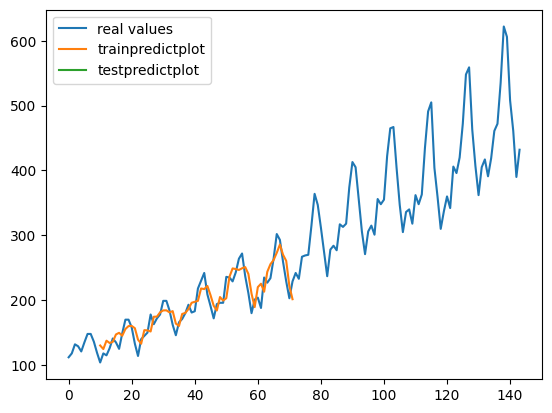

In [74]:
trainpredictplot=np.empty_like(dataset)
trainpredictplot[:,:]=np.nan
trainpredictplot[time_stemp:len(trainpredict)+time_stemp, 0] = trainpredict[:, 0]
testpredictplot=np.empty_like(dataset)
testpredictplot[:,:]=np.nan
print(testpredictplot[len(trainpredict)+(time_stemp*2)+1:len(dataset)-1, 0].shape)
plt.plot(scaler.inverse_transform(dataset),label="real values")
plt.plot(trainpredictplot,label="trainpredictplot")
plt.plot(testpredictplot,label="testpredictplot")
plt.legend()
plt.show()